In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import json
from pathlib import Path

import eeweather
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

import eemeter

In [3]:
data_dir = Path.cwd() / '../.data'

In [4]:
with open(data_dir / 'summary.json', 'r') as f:
    summary = json.load(f)

{
  "state": "NE",
  "zcta": "68655",
  "freq": "billing_bimonthly",
  "interpretation": "electricity",
  "blackout_start": "2015-12-28T00:00:00",
  "blackout_end": "2016-01-11T00:00:00",
  "baseline_days": 370,
  "reporting_days": 370,
  "usaf_id": "723441",
  "meter_data_filename": "electricity-billing_bimonthly-NE-723441-b1y-r1y.csv",
  "metadata_filename": "electricity-billing_bimonthly-NE-723441-b1y-r1y.json",
  "tempF_filename": "electricity-billing_bimonthly-NE-723441-b1y-r1y-tempF.csv",
  "tz": "US/Central"
}


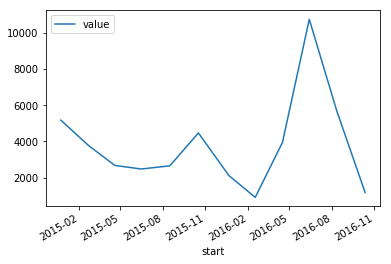

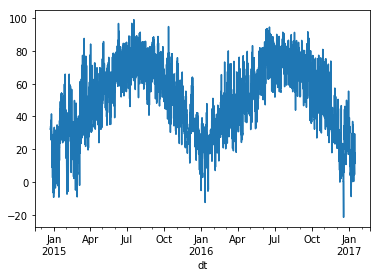

{
  "id": "ELEC878075231",
  "interpretation": "electricity",
  "unit": "kWh",
  "freq": "billing_bimonthly",
  "ground_truth": {
    "annual_baseline_total_load": 21357.155139627535,
    "annual_baseline_base_load": 10857.901031872907,
    "annual_baseline_heating_load": 9595.776855922802,
    "annual_baseline_cooling_load": 903.4772518318254,
    "baseline_heating_balance_point": 69.98331999758892,
    "baseline_cooling_balance_point": 58.4090319848314,
    "annual_reporting_total_load": 23684.05663801202,
    "annual_reporting_base_load": 2144.0470225750287,
    "annual_reporting_heating_load": 27.73829446478029,
    "annual_reporting_cooling_load": 21512.27132097221,
    "reporting_heating_balance_point": 70.37122513573846,
    "reporting_cooling_balance_point": 61.518791145237635
  }
}


In [5]:
item = summary['electricity-billing_bimonthly-NE-723441-b1y-r1y']
print(json.dumps(item, indent=2))

meter_data = eemeter.meter_data_from_csv(data_dir / item['meter_data_filename'], tz=item['tz'])
meter_data.plot()
plt.show()

temp_data = eemeter.temperature_data_from_csv(data_dir / item['tempF_filename'])
temp_data.plot()
plt.show()

with open(data_dir / item['metadata_filename'], 'r') as f:
    metadata = json.load(f)

print(json.dumps(metadata, indent=2))

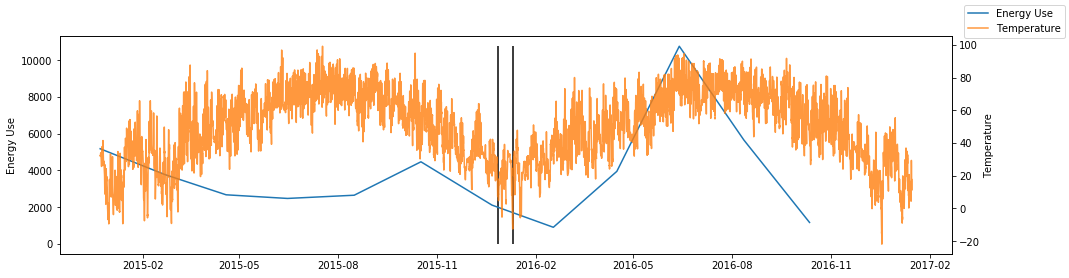

In [6]:
ax1, ax2 = eemeter.plot_time_series(meter_data, temp_data)
ax1.vlines(item['blackout_start'], 0, meter_data.value.max())
ax1.vlines(item['blackout_end'], 0, meter_data.value.max())
plt.show()

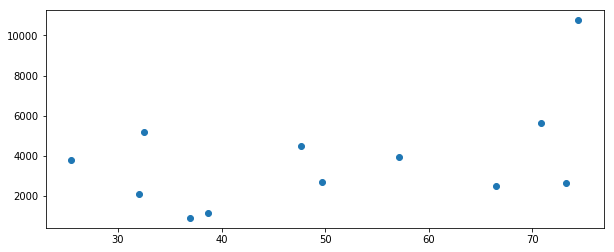

In [7]:
ax = eemeter.plot_energy_signature(meter_data, temp_data, temp_col='tempF')

In [25]:
daily_meter_data = eemeter.billing_to_daily(meter_data)

In [9]:
meter_data.head()

,value
start,
2014-12-23 00:00:00-06:00,5179.53
2015-02-21 00:00:00-06:00,3776.83
2015-04-19 01:00:00-05:00,2673.20
2015-06-15 01:00:00-05:00,2475.12
2015-08-16 01:00:00-05:00,2649.96


In [10]:
daily_meter_data.head()

,value
start,
2014-12-23 00:00:00-06:00,86.3255
2014-12-24 00:00:00-06:00,86.3255
2014-12-25 00:00:00-06:00,86.3255
2014-12-26 00:00:00-06:00,86.3255
2014-12-27 00:00:00-06:00,86.3255


In [11]:
data = eemeter.daily_hdd_cdd_ranges(daily_meter_data, temp_data)
data.head()

,usage_per_day,hdd_55,hdd_56,hdd_57,hdd_58,hdd_59,hdd_60,hdd_61,hdd_62,hdd_63,...,cdd_66,cdd_67,cdd_68,cdd_69,cdd_70,cdd_71,cdd_72,cdd_73,cdd_74,cdd_75
start,,,,,,,,,,,,,,,,,,,,,
2014-12-23 00:00:00-06:00,86.3255,22.384437,23.384437,24.384437,25.384437,26.384437,27.384437,28.384437,29.384437,30.384437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-24 00:00:00-06:00,86.3255,24.991392,25.991392,26.991392,27.991392,28.991392,29.991392,30.991392,31.991392,32.991393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-25 00:00:00-06:00,86.3255,21.994812,22.994812,23.994812,24.994812,25.994812,26.994812,27.994812,28.994812,29.994812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-26 00:00:00-06:00,86.3255,28.499067,29.499067,30.499067,31.499067,32.499067,33.499067,34.499067,35.499067,36.499067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-27 00:00:00-06:00,86.3255,37.683755,38.683755,39.683755,40.683755,41.683755,42.683755,43.683755,44.683755,45.683755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_quality = eemeter.daily_data_quality(daily_meter_data, temp_data)
data_quality[data_quality.temperature_null > 0]

,usage_per_day_not_null,temperature_not_null,temperature_null
start,,,
2015-06-17 00:00:00-05:00,True,21,3.0
2015-07-02 00:00:00-05:00,True,15,9.0
2015-09-29 00:00:00-05:00,False,23,1.0
2015-10-02 00:00:00-05:00,False,23,1.0
2016-01-04 00:00:00-06:00,True,17,7.0
2016-03-28 00:00:00-05:00,False,21,3.0
2016-07-16 00:00:00-05:00,True,23,1.0
2016-09-15 00:00:00-05:00,True,22,2.0


In [13]:
blackout_start = pd.to_datetime(item['blackout_start']).tz_localize('UTC')
blackout_end = pd.to_datetime(item['blackout_end']).tz_localize('UTC')

baseline_data = eemeter.get_baseline_data(data, end=blackout_start)
reporting_data = eemeter.get_reporting_data(data, start=blackout_end)

baseline_data_quality = eemeter.get_baseline_data(data_quality, end=blackout_start)
reporting_data_quality = eemeter.get_reporting_data(data_quality, start=blackout_end)

baseline_temp_data = eemeter.get_baseline_data(temp_data, end=blackout_start)
reporting_temp_data = eemeter.get_reporting_data(temp_data, start=blackout_end)

baseline_meter_data = eemeter.get_baseline_data(meter_data, end=blackout_start)
reporting_meter_data = eemeter.get_reporting_data(meter_data, start=blackout_end)

baseline_daily_meter_data = eemeter.get_baseline_data(daily_meter_data, end=blackout_start)
reporting_daily_meter_data = eemeter.get_reporting_data(daily_meter_data, start=blackout_end)

In [31]:
fit_cdd = metadata['interpretation'] != 'gas'
baseline_model_fit = eemeter.caltrack_daily_method(baseline_data, fit_cdd=fit_cdd)
reporting_model_fit = eemeter.caltrack_daily_method(reporting_data, fit_cdd=fit_cdd)
print(baseline_model_fit)
print(reporting_model_fit)

ModelFit(status='SUCCESS', method_name='caltrack_daily_method', r_squared=0)
ModelFit(status='SUCCESS', method_name='caltrack_daily_method', r_squared=0.5698125181802881)


In [15]:
baseline_data_sufficiency = eemeter.caltrack_daily_sufficiency_criteria(
    baseline_data_quality, requested_start=None, requested_end=blackout_start)
reporting_data_sufficiency = eemeter.caltrack_daily_sufficiency_criteria(
    reporting_data_quality, requested_start=blackout_end, requested_end=None)

In [16]:
baseline_data_sufficiency.json()

{'criteria_name': 'caltrack_daily_sufficiency_criteria',
 'metadata': [],
 'settings': {'min_days': 365,
  'min_fraction_coverage': 0.9,
  'min_fraction_daily_temperature_hourly_coverage': 0.9},
 'status': 'FAIL',
 'warnings': [{'data': {'n_days_total': 365, 'n_valid_rows': 211},
   'description': 'Too many days in data have missing meter data or temperature data.',
   'qualified_name': 'eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_data'},
  {'data': {'n_days_total': 365, 'n_valid_meter_data_rows': 213},
   'description': 'Too many days in data have missing meter data.',
   'qualified_name': 'eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_meter_data'}]}

In [17]:
reporting_data_sufficiency.json()

{'criteria_name': 'caltrack_daily_sufficiency_criteria',
 'metadata': [],
 'settings': {'min_days': 365,
  'min_fraction_coverage': 0.9,
  'min_fraction_daily_temperature_hourly_coverage': 0.9},
 'status': 'FAIL',
 'warnings': [{'data': {'min_days': 365, 'n_days_total': 340},
   'description': 'Fewer days in data than the allowable minimum.',
   'qualified_name': 'eemeter.caltrack_daily_sufficiency_criteria.too_few_days'},
  {'data': {'n_days_total': 340, 'n_valid_rows': 192},
   'description': 'Too many days in data have missing meter data or temperature data.',
   'qualified_name': 'eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_data'},
  {'data': {'n_days_total': 340, 'n_valid_meter_data_rows': 192},
   'description': 'Too many days in data have missing meter data.',
   'qualified_name': 'eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_meter_data'}]}

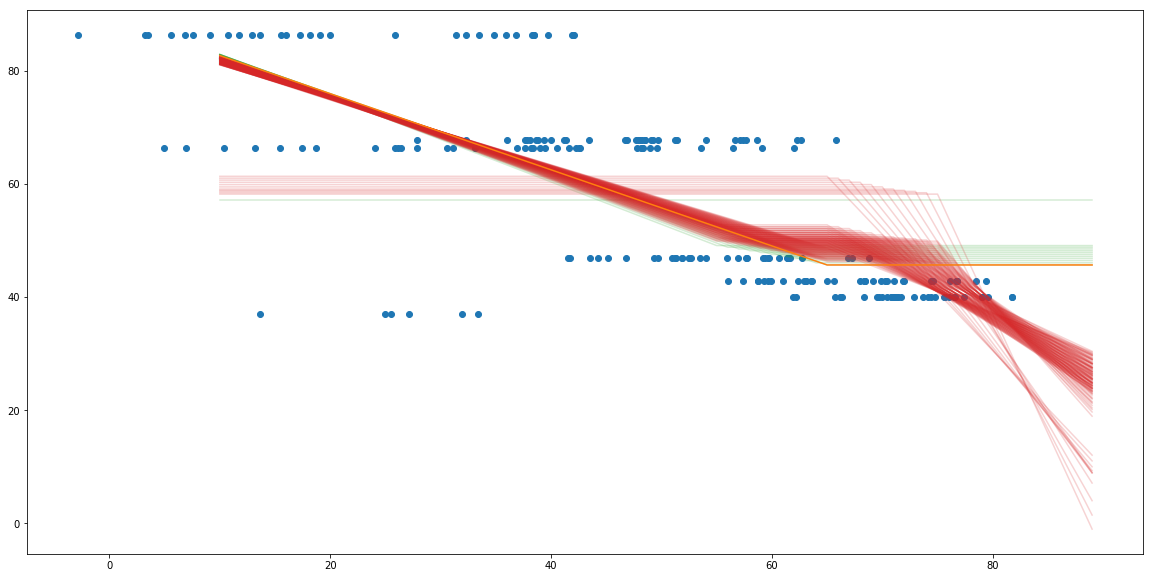

In [30]:
ax = eemeter.plot_energy_signature(baseline_daily_meter_data, baseline_temp_data, temp_col='tempF', figsize=(20, 10))

for candidate in baseline_model_fit.candidates:
    eemeter.plot_caltrack_candidate(candidate, ax=ax, temp_min=10, temp_max=90)

eemeter.plot_caltrack_candidate(baseline_model_fit.model, ax=ax, temp_min=10, temp_max=90, best=True)

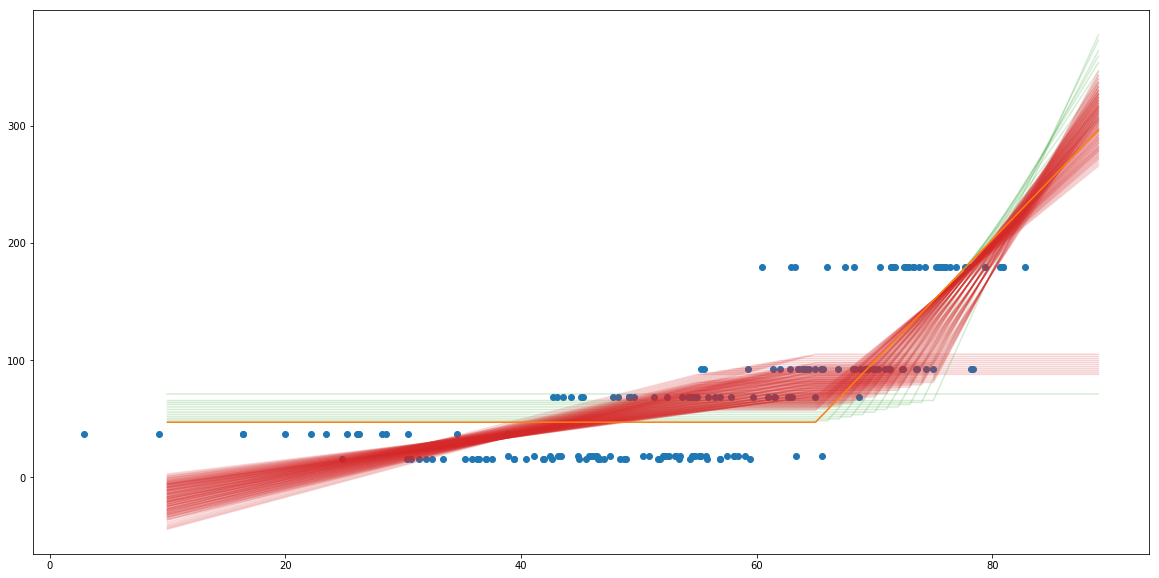

In [29]:
ax = eemeter.plot_energy_signature(reporting_daily_meter_data, reporting_temp_data, temp_col='tempF', figsize=(20, 10))

for candidate in reporting_model_fit.candidates:
    eemeter.plot_caltrack_candidate(candidate, ax=ax, temp_min=10, temp_max=90)

eemeter.plot_caltrack_candidate(reporting_model_fit.model, ax=ax, temp_min=10, temp_max=90, best=True)

In [27]:
# Use models for prediction!



In [ ]:
# # lambda
# for project in projects[:1]:
    
#     for meter_data, metadata in project['loaded']:
        
#         start, end = meter_data.index[0], meter_data.index[-1]
#         matching_result = eeweather.match_zcta(project['zcta'])
#         station = matching_result.isd_station
#         tempC = station.load_isd_hourly_temp_data(start, end)
#         tempF = tempC * 1.8 + 32
        
#         meter_json = [
#             [i.isoformat(), row.value]
#             for i, row in meter_data.iterrows()
#         ]
#         temp_json = [
#             [i.isoformat(), t]
#             for i, t in tempF.iteritems()
#         ]
        
#         base_url = 'https://ad6906bhik.execute-api.us-west-2.amazonaws.com/dev'
#         headers = {
#             'Content-Type': 'application/json'
#         }
#         model_data = {
#             'method': 'caltrack_daily_method',
#             'meter_data': meter_json,
#             'temperature_data': temp_json,
#         }
#         response = requests.post('{}/fit_baseline_model'.format(base_url), data=json.dumps(model_data), headers=headers)
#         print(json.dumps(response.json(), indent=2)[:500])
        
#         sufficiency_data = {
#             'criteria': 'caltrack_daily_baseline_sufficiency_criteria',
#             'meter_data': meter_json,
#             'temperature_data': temp_json,
#         }
#         response = requests.post('{}/check_baseline_data_sufficiency'.format(base_url), data=json.dumps(sufficiency_data), headers=headers)
#         print(json.dumps(response.json(), indent=2)[:500])
        